# RC Circuit Simulation

**For the RC circuit**  
Input is the Voltage which Circuit generate on the R C serial circuit  
Output is the Voltage on the Capacitor  
$I_C=C\frac{dU_C}{dt}$  
$U_C=\frac{1}{C}\int{i dt}$  
$U=R*I+\frac{1}{C}\int{i dt}$  
$L(U)=(R+\frac{1}{C*S})L(I)$  
$L(U_C)=\frac{1}{C*S}*L(I)$  
$TF=\frac{L(U_C)}{L(U)}=\frac{\frac{1}{C*S}*L(I)}{(R+\frac{1}{C*S})*L(I)}=\frac{1}{RCS+1}$  
$num=[1]$  
$den=[RC \ 1]$

#### sympy Transfer Function

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'
# svg retina

import sympy as sym
from sympy.physics.control.lti import TransferFunction

from sympy.physics.control.control_plots import pole_zero_plot
# from sympy.physics.control.control_plots import step_response_plot
# from sympy.physics.control.control_plots import step_response_numerical_data

from sympy.physics.control.control_plots import bode_plot
# from sympy.physics.control.control_plots import bode_phase_numerical_data
# from sympy.physics.control.control_plots import bode_magnitude_numerical_data
from sympy.physics.control.control_plots import impulse_response_plot
from sympy.physics.control.control_plots import step_response_plot
from sympy.physics.control.control_plots import ramp_response_plot
# from sympy.physics.control.control_plots import ramp_response_numerical_data
from sympy.abc import s
import numpy as np
import control as ct


In [2]:
# R=10K
R=10e3
# C=100nF
C=100e-9
print(R)
print(C)
print(R*C)


10000.0
1e-07
0.001


In [3]:
1/(2*np.pi*R*C)

159.15494309189535

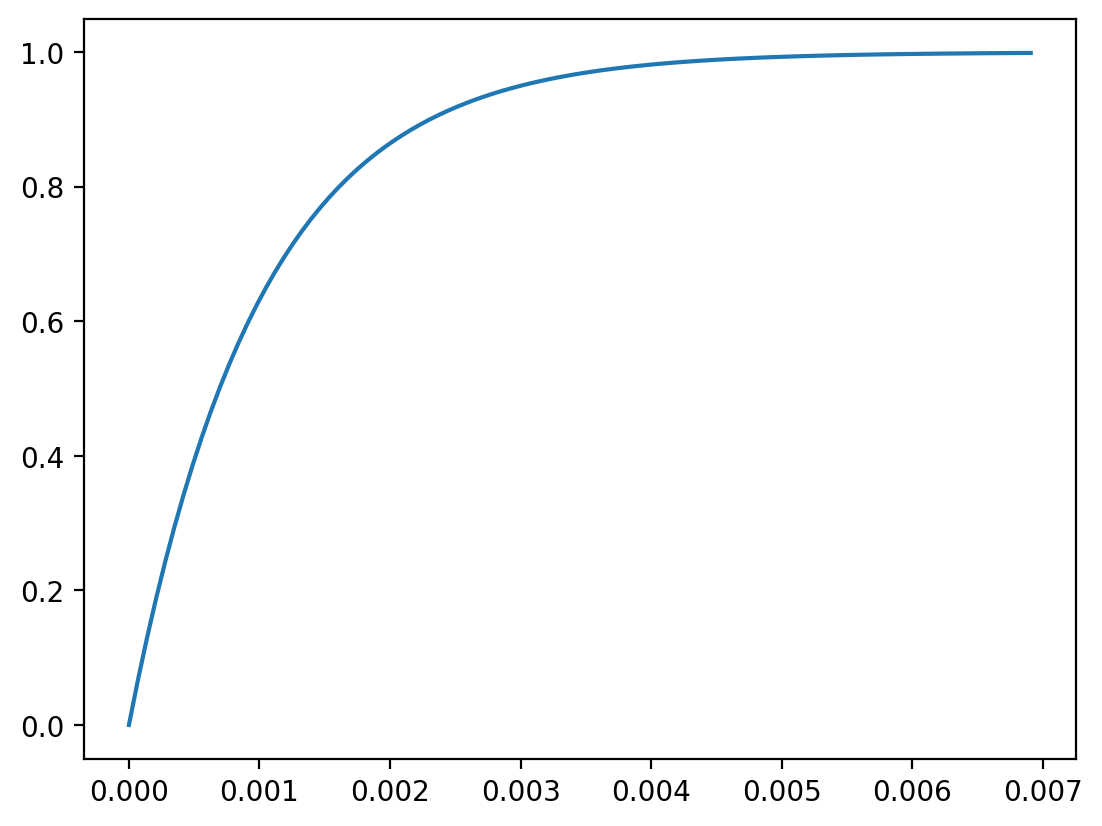

In [4]:
num=[1]
den=[R*C, 1]
tf=ct.tf(num,den)
# y,t=ct.step_response(tf)
# Gmag, Gphase, Gomega =ct.bode_plot(tf,Hz=True)
T, yout = ct.step_response(tf)
plt.plot(T,yout)
# plt.grid()

In [5]:
tf

TransferFunction(array([1]), array([0.001, 1.   ]))

# RL Circuit Simulation

**For the RL circuit**  
Input is the Voltage which Circuit generate on the Inductor  
Output is the Current which flow through the Inductor  
$U=R*I+L*\frac{dI}{dt}$  
$L(U)=L(I)*(R+L*S)$  
$TF=\frac{L(I)}{L(U)}=\frac{1}{L*S+R}$  
$num=[1]$  
$den=[L \ R]$

In [6]:
# Varient 1
# R=30R
R=30
# L=20mH
L=20e-3
# Varient 2
# R=30R
R_1=19.4
# L=20mH
L_1=12.4e-3



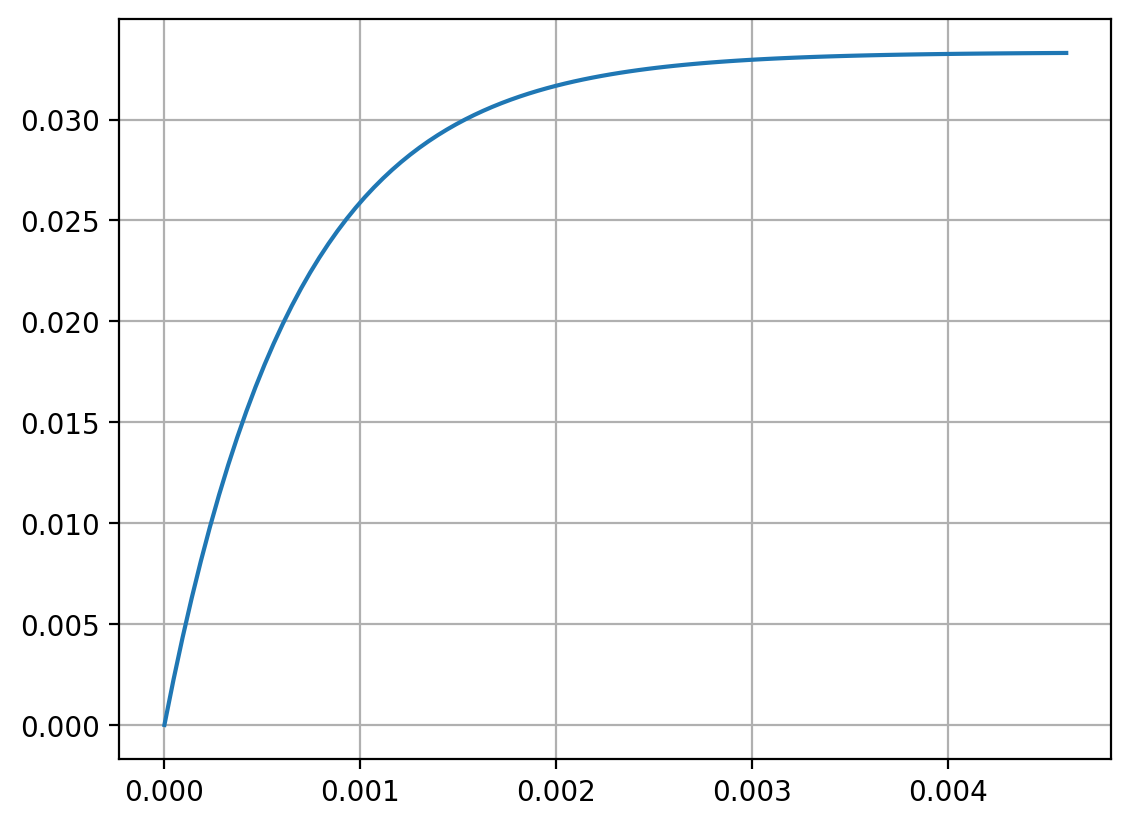

In [7]:
num=[1]
den=[L, R]
tf_RL=ct.tf(num,den)
num_1=[1]
den_1=[L_1, R_1]
tf_RL_1=ct.tf(num_1,den_1)
# y,t=ct.step_response(tf)
# Gmag, Gphase, Gomega =ct.bode_plot(tf,Hz=True)
T, yout = ct.step_response(tf_RL)
plt.plot(T,yout)
plt.grid()

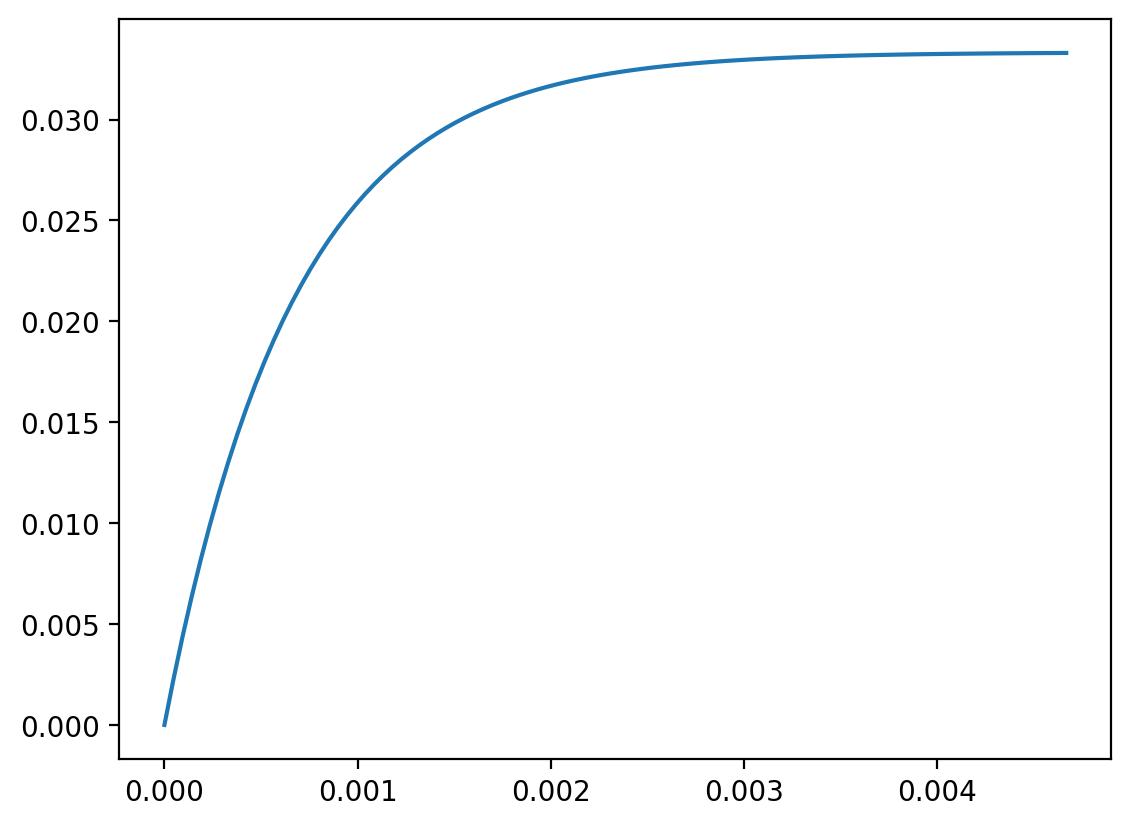

In [8]:
from scipy import signal
tf_RL=signal.TransferFunction(num,den)
tf_RL_1=signal.TransferFunction(num_1,den_1)
t, y = signal.step(tf_RL)
plt.plot(t,y)

In [9]:


#Sin wave Drive Frequency
Sin_T=4*11.4e-3
Sin_Freq=1/Sin_T #1Hz
omega=2*np.pi*Sin_Freq

Time_Step=1/40e6#MCU run time step 40MHz #1/2e4
Time_Start=0
Time_Stop=10*Sin_T
t=np.arange(Time_Start,Time_Stop,Time_Step)

Sin_Signal=np.sin(omega*t)

PWM_Freq=20e3#2e4#30Hz
PWM_Duty=(Sin_Signal+1)/2
PWM_Omega=2*np.pi*PWM_Freq
PWM_Signal=signal.square(PWM_Omega*t,PWM_Duty)

In [10]:
# lsim(tf_RL,)
tout, yout, xout = signal.lsim(tf_RL, U=PWM_Signal, T=t)
tout_1, yout_1, xout_1 = signal.lsim(tf_RL_1, U=PWM_Signal, T=t)


(0.0, 0.002)

(0.0, 0.00752)

(0.0, 0.002)

(0.0, 0.00752)

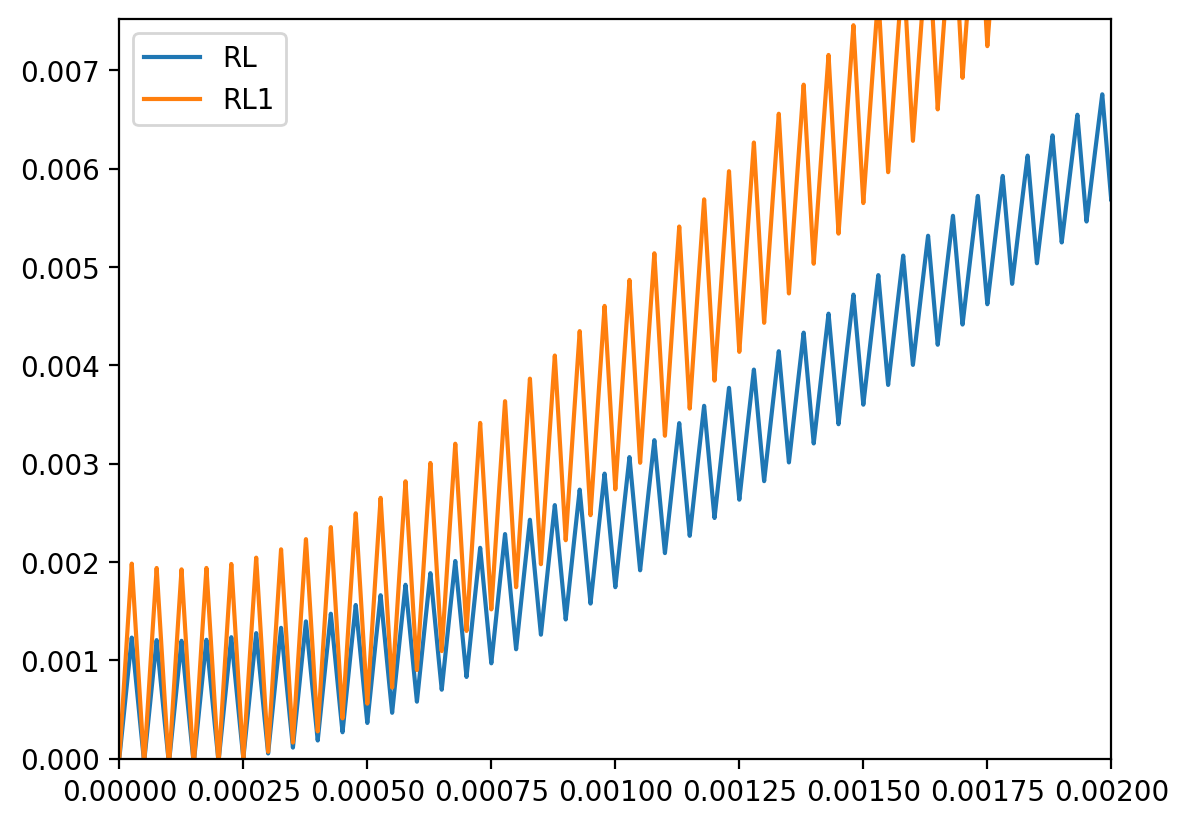

In [16]:
plt.plot(tout, yout,label="RL")
plt.xlim(0,0.002)
plt.ylim(0,0.00752)
plt.legend()
plt.plot(tout_1,yout_1,label="RL1")
plt.xlim(0,0.002)
plt.ylim(0,0.00752)
plt.legend()

(0.0, 0.002)

(0.0, 0.00752)

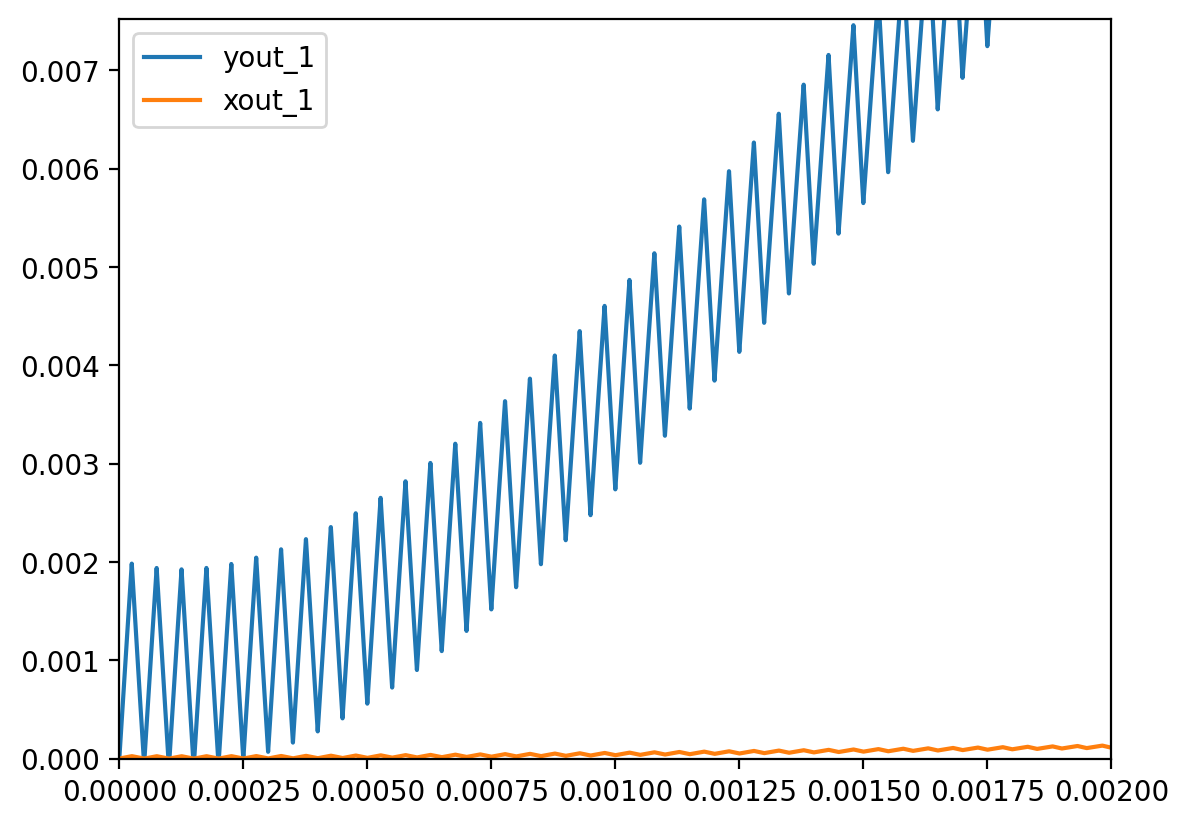

In [17]:
plt.plot(tout_1,xout_1,label="xout_1")
plt.plot(tout_1,yout_1,label="yout_1")
plt.xlim(0,0.002)
plt.ylim(0,0.00752)
plt.legend()